Apakah seseorang memiliki kesempatan lebih besar untuk berlangganan atau tidak (target y bernilai binary “yes”/”no” ).

# Import and read

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle


In [2]:
df = pd.read_csv('data_1C.csv')
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


# Drop unecessary column

drop unecessary column for this case column 'Unamed: 0'

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


# Check missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          8237 non-null   int64  
 1   job          8227 non-null   object 
 2   marital      8237 non-null   object 
 3   education    8237 non-null   object 
 4   default      8237 non-null   object 
 5   housing      8237 non-null   object 
 6   loan         8237 non-null   object 
 7   contact      8237 non-null   object 
 8   month        8237 non-null   object 
 9   day_of_week  8237 non-null   object 
 10  duration     8222 non-null   float64
 11  campaign     8237 non-null   int64  
 12  pdays        8237 non-null   int64  
 13  previous     8237 non-null   int64  
 14  poutcome     8237 non-null   object 
 15  y            8237 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 1.0+ MB


In [5]:
#check missing values
df.isna().sum()

age             0
job            10
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       15
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

there are 10 missing values for column job and 15 missing values for column duration

In [6]:
print(df['job'].value_counts())
print()
print(df['duration'].value_counts())

job
admin.           2046
blue-collar      1860
technician       1375
services          777
management        625
retired           339
self-employed     293
entrepreneur      279
unemployed        201
housemaid         188
student           181
unknown            63
Name: count, dtype: int64

duration
72.0      46
125.0     41
69.0      38
73.0      37
113.0     36
          ..
1066.0     1
840.0      1
1117.0     1
880.0      1
589.0      1
Name: count, Length: 1022, dtype: int64


In [7]:
# Fill missing values in 'job' with the mode
job = df['job'].mode()[0]
df['job'] = df['job'].fillna(job)

# Fill missing values in 'duration' with the mean
duration = round(df['duration'].mean())
df['duration'] = df['duration'].fillna(duration)

print(job)
print(duration)

admin.
260


In [8]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

# Encoding 

In [9]:
for i in df.columns:
  print(df[i].value_counts())
  print()

age
31    377
32    376
36    367
34    364
35    362
     ... 
17      2
83      2
98      1
84      1
87      1
Name: count, Length: 73, dtype: int64

job
admin.           2056
blue-collar      1860
technician       1375
services          777
management        625
retired           339
self-employed     293
entrepreneur      279
unemployed        201
housemaid         188
student           181
unknown            63
Name: count, dtype: int64

marital
married     4943
single      2345
divorced     936
unknown       13
Name: count, dtype: int64

education
university.degree      2456
high.school            1902
basic.9y               1157
professional.course    1070
basic.4y                862
basic.6y                456
unknown                 328
illiterate                6
Name: count, dtype: int64

default
no         6533
unknown    1701
yes           3
Name: count, dtype: int64

housing
yes        4308
no         3730
unknown     199
Name: count, dtype: int64

loan
no         6890
y

In [10]:
# Encode for month and day_of_week
# month from march to december so from 3-12
# day_of_week from monday to friday so from 1-5
month = {'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

df['month'] = df['month'].map(month)
df['day_of_week'] = df['day_of_week'].map(day)


In [11]:
# Initialize LabelEncoder
label_encoders = {}
# List of categorical columns to encode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,9,2,2,0,2,0,0,11,3,648.0,1,999,0,1,no
1,31,0,2,6,0,0,0,0,8,3,295.0,1,999,0,1,no
2,27,1,2,2,0,2,0,1,7,1,236.0,2,999,0,1,no
3,30,7,1,7,0,0,0,1,5,3,143.0,3,999,0,1,no
4,32,9,1,6,0,0,0,0,8,4,155.0,1,999,0,1,no


In [12]:
for i in df.columns:
  print(df[i].value_counts())
  print()

age
31    377
32    376
36    367
34    364
35    362
     ... 
17      2
83      2
98      1
84      1
87      1
Name: count, Length: 73, dtype: int64

job
0     2056
1     1860
9     1375
7      777
4      625
5      339
6      293
2      279
10     201
3      188
8      181
11      63
Name: count, dtype: int64

marital
1    4943
2    2345
0     936
3      13
Name: count, dtype: int64

education
6    2456
3    1902
2    1157
5    1070
0     862
1     456
7     328
4       6
Name: count, dtype: int64

default
0    6533
1    1701
2       3
Name: count, dtype: int64

housing
2    4308
0    3730
1     199
Name: count, dtype: int64

loan
0    6890
2    1148
1     199
Name: count, dtype: int64

contact
0    5253
1    2984
Name: count, dtype: int64

month
5     2754
7     1439
8     1200
6     1051
11     857
4      519
10     143
9      119
3      112
12      43
Name: count, dtype: int64

day_of_week
1    1703
3    1668
4    1636
2    1623
5    1607
Name: count, dtype: int64

duration
72.0

# Correlation matrix of features

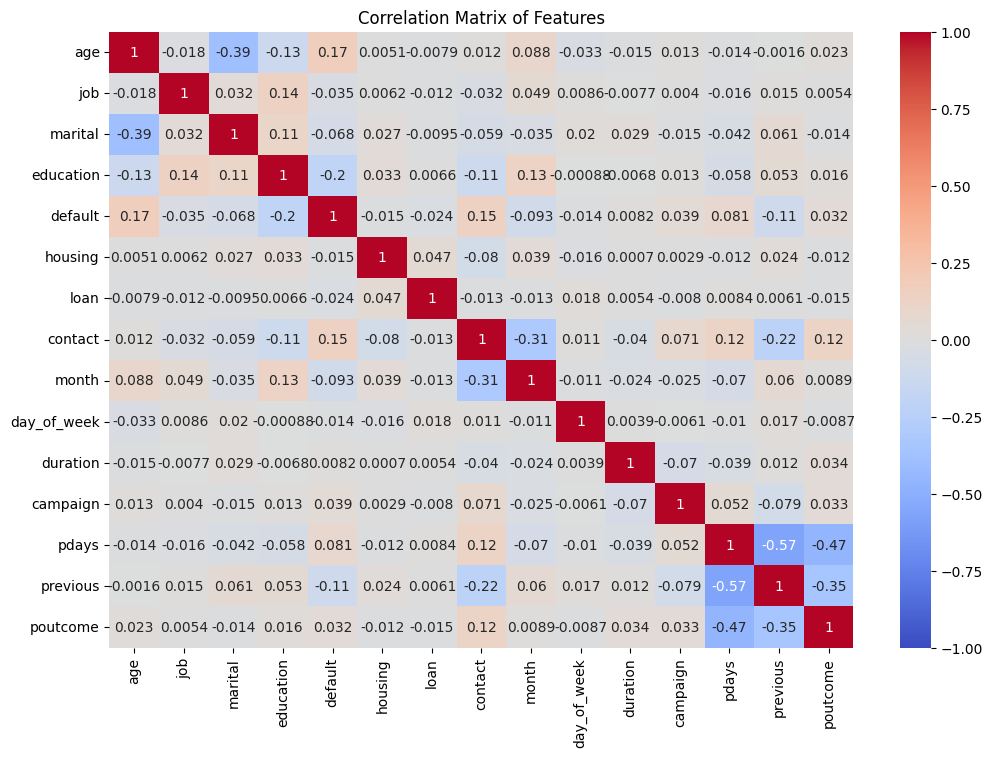

In [13]:
data_without_y = df.drop(columns=['y'])

# Menghitung matriks korelasi
correlation_matrix = data_without_y.corr()

# Menampilkan matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

# Split the data

In [14]:
# Splitting the data into features and target
X = df.drop('y', axis=1) 
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6589, 15), (1648, 15), (6589,), (1648,))

In [15]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model and choose the best

In [16]:
# Model 1: SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      1464
         yes       0.56      0.20      0.30       184

    accuracy                           0.89      1648
   macro avg       0.73      0.59      0.62      1648
weighted avg       0.87      0.89      0.87      1648



In [17]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      1464
         yes       0.57      0.36      0.44       184

    accuracy                           0.90      1648
   macro avg       0.75      0.66      0.69      1648
weighted avg       0.88      0.90      0.89      1648



In [18]:
# Save the best model
best_model = svm_model if svm_model.score(X_test, y_test) > rf_model.score(X_test, y_test) else rf_model
best_model

RandomForestClassifier(random_state=42)

# Make the pickle model

In [19]:
model_path = 'best_model.pkl'
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
